In [ ]:
# Tensors - Numpy, GPU Support
# Autograd
# Training Loop with Model, Loss and Optimizer
# Neural network - GPU, Datasets, DataLoader, Transforms and Evaluation
# Convolutional Neural Network

In [1]:
import torch

In [2]:
# torch.empty(size): unintialize
x = torch.empty(1) # scalar
print("empty(1):", x)

tensor([-2822076.])


In [3]:
x = torch.empty(3) # vector
print("empty(3):", x)

empty(3): tensor([ 4.7911e-22,  0.0000e+00, -2.8219e+06])


In [4]:
x = torch.empty(2,3) # matrix
print("empty(2,3):", x)

empty(2,3): tensor([[3.3913e-25, 0.0000e+00, 4.0850e-22],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [5]:
x = torch.empty(2, 2, 3) # tensor, 3 dimensions
# x = torch.empty(2, 2, 2, 3) # tensor, 4 dimensions
print("empty(2, 2, 3):", x)

empty(2, 2, 3): tensor([[[0.0000e+00, 0.0000e+00, 7.7052e+31],
         [1.9447e+31, 2.1715e-18, 2.3081e-12]],

        [[2.6302e+20, 6.1943e-04, 3.6022e-12],
         [6.9989e+22, 2.6330e+20, 6.1943e-04]]])


In [6]:
# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print("rand(5, 3):", x)

rand(5, 3): tensor([[0.9698, 0.1606, 0.9727],
        [0.2859, 0.8227, 0.0445],
        [0.0609, 0.5286, 0.5240],
        [0.7525, 0.3149, 0.0291],
        [0.8424, 0.3689, 0.2370]])


In [7]:
# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print("zeros(5, 3):", x)

zeros(5, 3): tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [8]:
# check size
print("size", x.size()) # x.size(0)
print("shape", x.shape) # x.shape[0]

size torch.Size([5, 3])
shape torch.Size([5, 3])


In [9]:
# check data type
print(x.dtype)

# specific types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)


In [10]:
# check type
print(x.dtype)

torch.float16


In [11]:
# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)


In [12]:
# check type
print(x.dtype)

torch.float16


In [13]:
# construct from data
x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


In [14]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# Later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


In [15]:
# Operations with Tensors

# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x, y)

# in place addition, everything with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x)

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.8228, 0.9452],
        [0.2256, 0.5403]])
tensor([[1.8228, 1.9452],
        [1.2256, 1.5403]])


In [18]:
# subtraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)

# division
z = x / y

In [20]:
# slicing
x = torch.rand(5,3)
print(x)

tensor([[0.5648, 0.8734, 0.4286],
        [0.7367, 0.2552, 0.7813],
        [0.3721, 0.3044, 0.2969],
        [0.2998, 0.7709, 0.8229],
        [0.5022, 0.2531, 0.3183]])


In [21]:
print("x[:, 0]", x[:, 0]) # all rows, column 0
print("x[1, :]", x[1, :]) # row 1, all columns
print("x[1, 1]", x[1, 1]) # element at 1, 1

x[:, 0] tensor([0.5648, 0.7367, 0.3721, 0.2998, 0.5022])
x[1, :] tensor([0.7367, 0.2552, 0.7813])
x[1, 1] tensor(0.2552)


In [22]:
# Get the actual value if only 1 element in your tensor
print("x[1, 1].item()", x[1,1].item())

x[1, 1].item() 0.25521785020828247


In [23]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # the size is -1 is inferred from other dimensions
# if -1 pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [24]:
# Numpy
# COnverting a torch tensor to a numpy array and vice versa

In [25]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [26]:
# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [27]:
# Careful: If the Tensor is on the CPU (not the GPU)
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [28]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [29]:
# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [30]:
# GPU support
# by default all tensors are created on the CPU
# But we can also move them to the GPU
# or create them directly on the GPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2).to(device) # move tensors to GPU device
# x = x.to("cpu")
# x = x.to("cuda")

x = torch.rand(2,2, device=device) # or directly create them on GPU

In [31]:
# Autograd
# The autograd provides automatic differentiation for all operations on tensors
# generally speaking, torch.autograd is a engine for computing the vector-jacobian product
# it computes partial derivateives while applying the chain rule
# set requires_grad = True

In [32]:
import torch

# reauires+grad = True -> tracks all operations on the tensor
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute
# grad_fn: refereces a function that has created the tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([ 0.0373, -0.5658, -0.6284], requires_grad=True)
tensor([2.0373, 1.4342, 1.3716], grad_fn=<AddBackward0>)


In [33]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([12.4523,  6.1708,  5.6439], grad_fn=<MulBackward0>)
tensor(8.0890, grad_fn=<MeanBackward0>)


In [34]:
# Let's compute the gradinents with the backpropogation
# when we finish our computation we can call .backward()
# and have all the gradients computed automatically
# it is the partial derivative of the function wrt the tensor

print(x.grad)
z.backward()
print(x.grad) # dz/dx

# careful backward() accumulates the gradient for this tensor into .grad attribute
# we need to be careful during optimization
# optimizer.zero_grad()

None
tensor([4.0747, 2.8684, 2.7432])


In [35]:
# stop tensor from tracking history
# for example during the training loop when we want to update our weights,
# or our training during evaluation
# these operations should not be part of the gradient computation
# to prevent this we can
# x.requires_grad_(False)
# x.detach()
# wrape in with torch.no_grad()

In [36]:
# .requires_grad_(...) changes an existing flag in-place
a = torch.randn(2,2)
b = (a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True)
b = (a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [37]:
# .detach(): get a new Tensor with the same content but with no gradient computation
a = torch.randn(2,2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [38]:
# .detach(): get a new tensor with the same conent but with no gradient computation
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

True
False


In [39]:
# Gradient Descent Autograd
# Linear regression
# f(x) = w*x + b

In [42]:
import torch

# Linear regression
# f = w * x  + b
# here : f = 2 * x

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

X_test = 5.0

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


In [43]:
# Training
learning_rate = 0.01
n_epoch = 100

for epoch in range(n_epoch):
  # predict = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # calculate gradients = backward pass
  l.backward()

  # update weights
  # w.data = w.data - learning_rate * w.grad
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero the gradients after updating
  w.grad.zero_()

  if (epoch+1) % 10 == 0:
    print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.00027047
epoch 20: w = 2.000, loss = 0.00000000
epoch 30: w = 2.000, loss = 0.00000000
epoch 40: w = 2.000, loss = 0.00000000
epoch 50: w = 2.000, loss = 0.00000000
epoch 60: w = 2.000, loss = 0.00000000
epoch 70: w = 2.000, loss = 0.00000000
epoch 80: w = 2.000, loss = 0.00000000
epoch 90: w = 2.000, loss = 0.00000000
epoch 100: w = 2.000, loss = 0.00000000
Prediction after training: f(5.0) = 10.000


In [44]:
# Model, Loss & Optimizer
# A typical PyToch pieline looks like this
# 1. Design model (input, output, forward pass with different layers)
# Construct loss and optimizer
# 3. Training loop
# Forward = compute prediction and loss
# Backward = compute gradients
# update weights

In [45]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x
# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 8, n_features = 1


In [46]:
# 1) Design Model, the model has to implement the forward pass!

# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)


input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_epochs):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = -3.762
epoch  10 : w =  2.067462682723999  loss =  0.03149978443980217
epoch  20 : w =  2.0662732124328613  loss =  0.028821369633078575
epoch  30 : w =  2.0636751651763916  loss =  0.02660534903407097
epoch  40 : w =  2.061178207397461  loss =  0.02455960400402546
epoch  50 : w =  2.058779239654541  loss =  0.02267121709883213
epoch  60 : w =  2.056474208831787  loss =  0.020928071811795235
epoch  70 : w =  2.054259777069092  loss =  0.019318901002407074
epoch  80 : w =  2.0521321296691895  loss =  0.01783347874879837
epoch  90 : w =  2.0500876903533936  loss =  0.016462257131934166
epoch  100 : w =  2.048123598098755  loss =  0.015196478925645351
Prediction after training: f(5.0) = 9.970


In [47]:
# First Neural Net
# GPU, Datatset, DataLoader, Transforms, Neural Net, Training & Evaluation

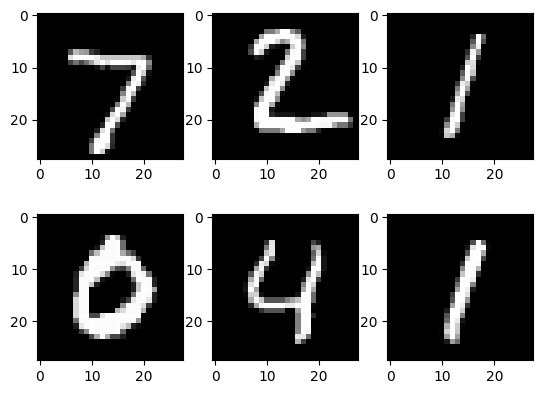

In [49]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [50]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.2315
Epoch [1/2], Step [200/600], Loss: 0.2866
Epoch [1/2], Step [300/600], Loss: 0.2315
Epoch [1/2], Step [400/600], Loss: 0.0816
Epoch [1/2], Step [500/600], Loss: 0.1721
Epoch [1/2], Step [600/600], Loss: 0.1106
Epoch [2/2], Step [100/600], Loss: 0.1645
Epoch [2/2], Step [200/600], Loss: 0.0600
Epoch [2/2], Step [300/600], Loss: 0.1198
Epoch [2/2], Step [400/600], Loss: 0.0927
Epoch [2/2], Step [500/600], Loss: 0.0577
Epoch [2/2], Step [600/600], Loss: 0.0490


In [51]:
# Test the model: we don't need to compute gradients
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 96.93 %


In [52]:
# CNN
# Convolution Layers
# MaxPooling
# Save/Load model

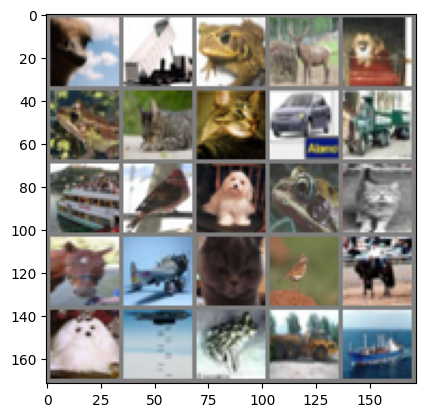

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs / 2 + 0.5   # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

In [55]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # N, 3, 32, 32
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = torch.flatten(x, 1)     # -> N, 1024
        x = F.relu(self.fc1(x))     # -> N, 64
        x = self.fc2(x)             # -> N, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

[1] loss: 1.494
[2] loss: 1.139
[3] loss: 0.985
[4] loss: 0.882
[5] loss: 0.806
[6] loss: 0.742
[7] loss: 0.687
[8] loss: 0.642
[9] loss: 0.600
[10] loss: 0.563
Finished Training


In [56]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the model: 71.25 %
Accuracy of the loaded model: 71.25 %
